<a href="https://colab.research.google.com/github/SRIHARITHUNGA/machine-learning/blob/main/House_Rent_Prediction_21241.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House_Rent_Prediction
###Thunga Srihari(21241)

##This model is built for predicting the rent of the house based on some important features.

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-deep")

#Loading Dataset

In [2]:
df = pd.read_csv("/content/House_Rent_Dataset.csv")
df_dum= pd.read_csv("/content/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#The Shape of the Dataset

In [3]:
df.shape

(4746, 12)

#Info about the Features in the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#Checking the null values

In [5]:
df.isna()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,False,False,False,False,False,False,False,False,False,False,False,False
4742,False,False,False,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,False,False,False,False,False,False,False,False
4744,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

There is no null values in the datset

#Pre-processing

In [7]:
df['floor_average'] = df.groupby(['Floor'])['Rent'].transform('mean')

In [8]:
df['area_locality_average'] = df.groupby(['Area Locality'])['Rent'].transform('mean')

floor_average: is the variable that takes the average rent for that specific floor.

area_locality_average: is the variable that takes the average rent of the house location.

In [9]:
def group_floor(median):
    if median > 20000:
        return 0
    elif median > 15000 and median < 20000:
        return 1
    elif median > 10000 and median < 15000:
        return 2
    elif median > 5000 and median < 10000:
        return 3
    else:
        return 4

In [10]:
df['floor_group'] = df.apply(lambda x: group_floor(x['floor_average']),axis=1)

In [11]:
df['locality_group'] = df.apply(lambda x: group_floor(x['area_locality_average']),axis=1)

In [12]:
df = df.drop('Posted On', 1)
df = df.drop('Floor', 1)
df = df.drop('Area Locality', 1)
df = df.drop('floor_average', 1)
df = df.drop('area_locality_average', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipyker

#Data visualization

In [13]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,floor_group,locality_group
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,3
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,2
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,3


#Finding which houses are more  based on SIZE, BHK, BATHROOM.

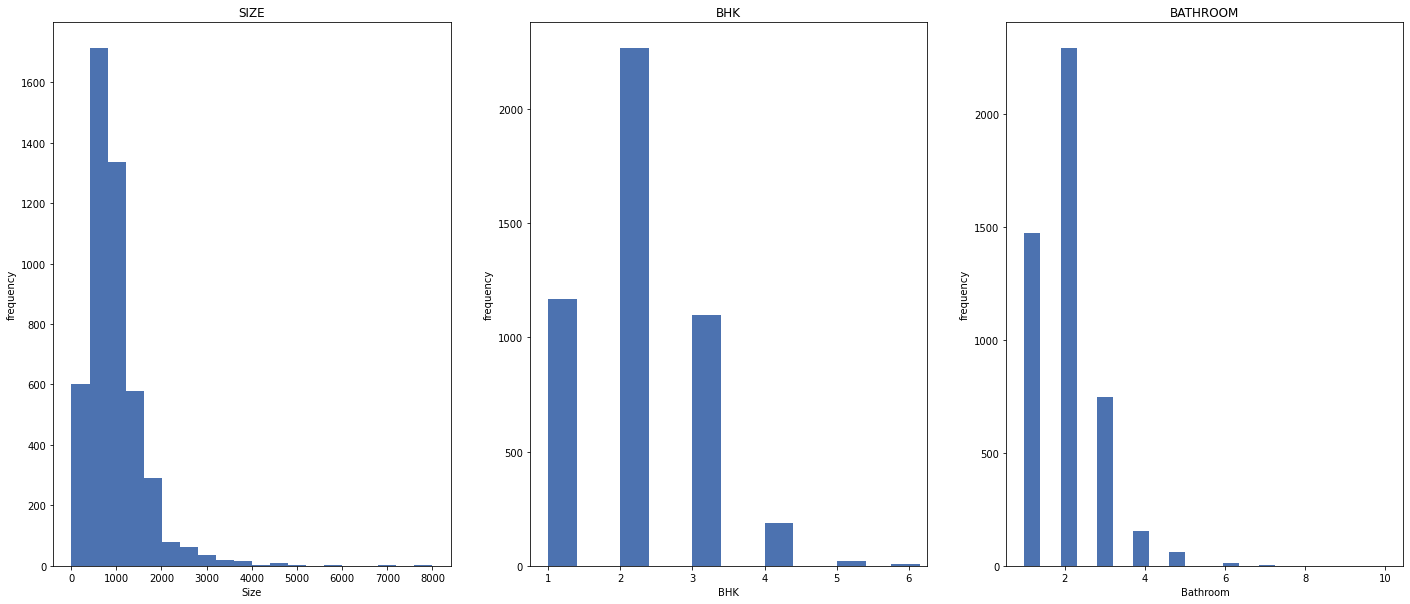

In [14]:
fig  = plt.figure(figsize = (10, 10))
plt.subplot(1, 3, 1)
n_bins=20
plt.hist(df_dum["Size"],  bins=n_bins)#, width=0.2)
plt.xlabel("Size")
plt.ylabel("frequency")
plt.title("SIZE")

plt.subplot(1, 3, 2)
n_bins=20
plt.hist(df_dum["BHK"],  bins=n_bins, width=0.4)
plt.xlabel("BHK")
plt.ylabel("frequency")
plt.title("BHK")

plt.subplot(1, 3, 3)
n_bins=20
plt.hist(df_dum["Bathroom"],  bins=n_bins, width=0.4)
plt.xlabel("Bathroom")
plt.ylabel("frequency")
plt.title("BATHROOM")

plt.subplots_adjust(right = 2)

1)5000-1000 square feet houses are more.

2)Houses with 2-BHK are and 2-Bathrooms are more

##Categorical variables data contribution

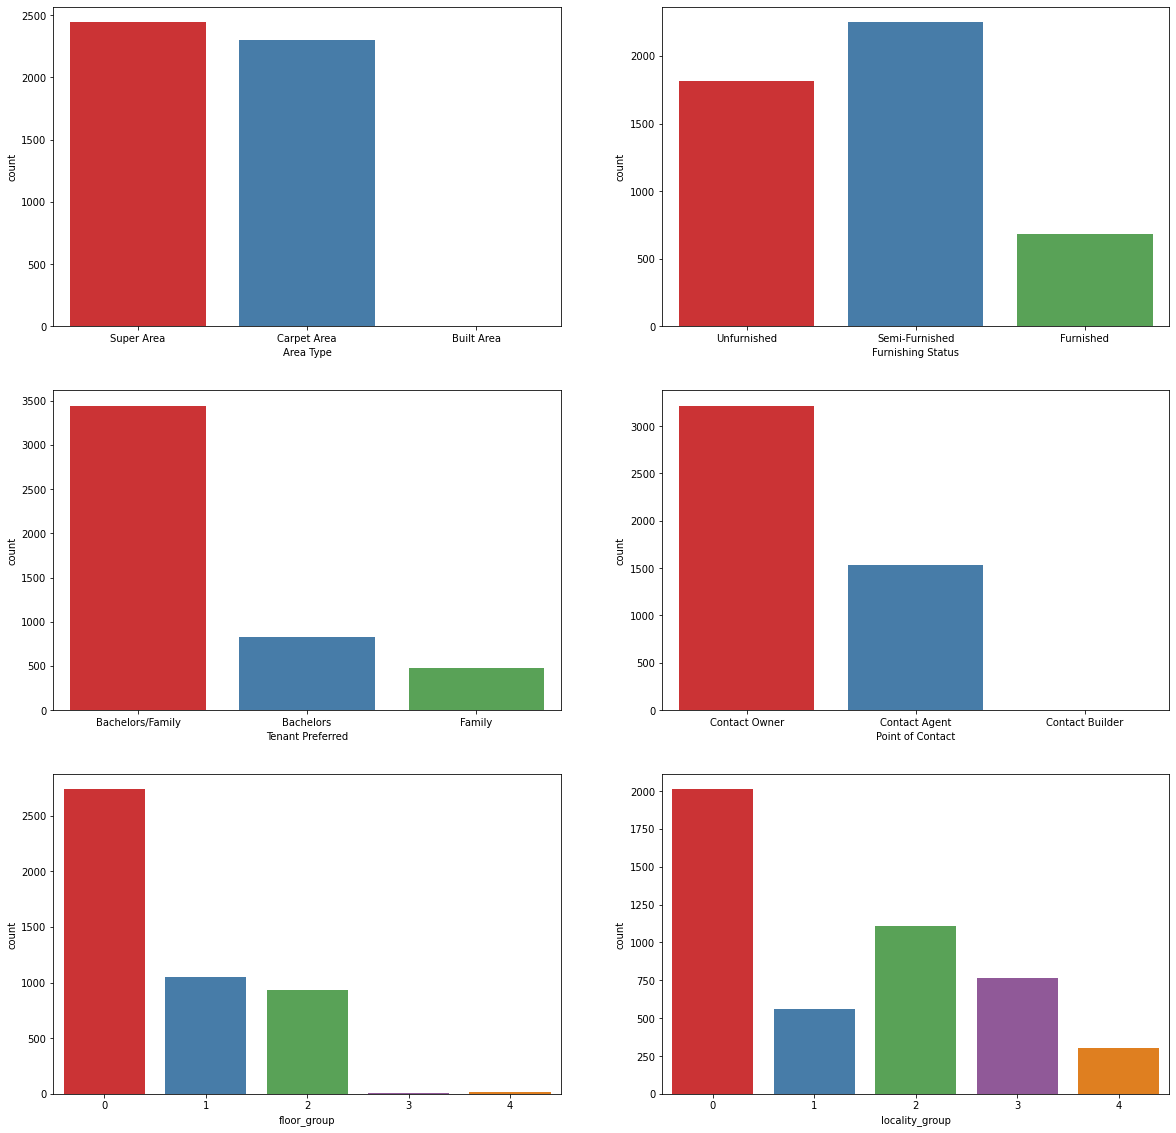

In [15]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Area Type', palette='Set1', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Furnishing Status', palette='Set1', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Tenant Preferred', palette='Set1', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Point of Contact', palette='Set1', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'floor_group', palette='Set1', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'locality_group', palette='Set1', data = df)

1)Area Type: Most of our data has the area in carpet or super area.

2)Furnishing: Much of the data is semi Furnished or Unfurnished.

3)Tenant: We can see that most locations do not have a tenant preference.

4)Point of Contact: most of the data you contact directly with the owner.

5)Floor Group: We can see the distribution of the variable we created, we can see that few floors have an average rent below 10000.

6)Locality Group: We can see that we have a good distribution of rental value depending on the location of the rental.

#Visualizing which Area locality having more house rent in some cities

In [16]:
df_dum["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [17]:
df1=df_dum[(df_dum["City"]=="Kolkata") & (df_dum["Area Type"]=="Super Area") & (df_dum["Floor"]=="1 out of 3") &(df_dum["Rent"] > 13000)]
df2=df_dum[(df_dum["City"]=="Bangalore") & (df_dum["Area Type"]=="Super Area") & (df_dum["Floor"]=="1 out of 3") & (df_dum["Rent"] > 13000)]
df3=df_dum[(df_dum["City"]=="Delhi") & (df_dum["Area Type"]=="Super Area") & (df_dum["Floor"]=="1 out of 3") & (df_dum["Rent"] > 13000)]
df4=df_dum[(df_dum["City"]=="Hyderabad") & (df_dum["Area Type"]=="Super Area") & (df_dum["Floor"]=="1 out of 3") & (df_dum["Rent"] > 13000)]
#df5=df_dum[(df_dum["City"]=="Mumbai") & (df_dum["Area Type"]=="Super Area") & (df_dum["Floor"]=="1 out of 3") & (df_dum["Rent"] > 13000)]
#df6=df_dum[(df_dum["City"]=="Chenni") & (df_dum["Area Type"]=="Super Area") & (df_dum["Floor"]=="1 out of 3") & (df_dum["Rent"] > 13000)]


In [18]:
def plot1(x):
  #x= x + 1
  if x==1: 
    var=df1
    y="kolkata"
  elif x==2:
    var=df2
    y="Banglore"
  elif x==3:
    var=df3
    y="Delhi"
  elif x==4:
    var=df4
    y="Hyderabad"  
  elif x==5:
    var=df5
    y="Mumbai"
  elif x==6:
    var=df6
    y="Chenni"    
  plt.subplot(2, 2, x)
  bars=plt.bar(var["Area Locality"], var["Rent"], color ='grey',width = 0.6)
  addlabels(bars)
  plt.xlabel("Area Locality")
  plt.ylabel("Rent")
  plt.xticks(rotation = 60)
  plt.subplots_adjust(hspace=0.4)
  plt.title("Finding Which AreaLocality having more House Rent in "+ y + " City")

In [19]:
def addlabels(var):
  for bar in var:
      height = bar.get_height()
      if height > 13000:
          plt.text(bar.get_x() + bar.get_width()/2., 1.02*height, 
                '%d'%int(height), ha = 'center', va = 'baseline', rotation = 0, fontsize=9)

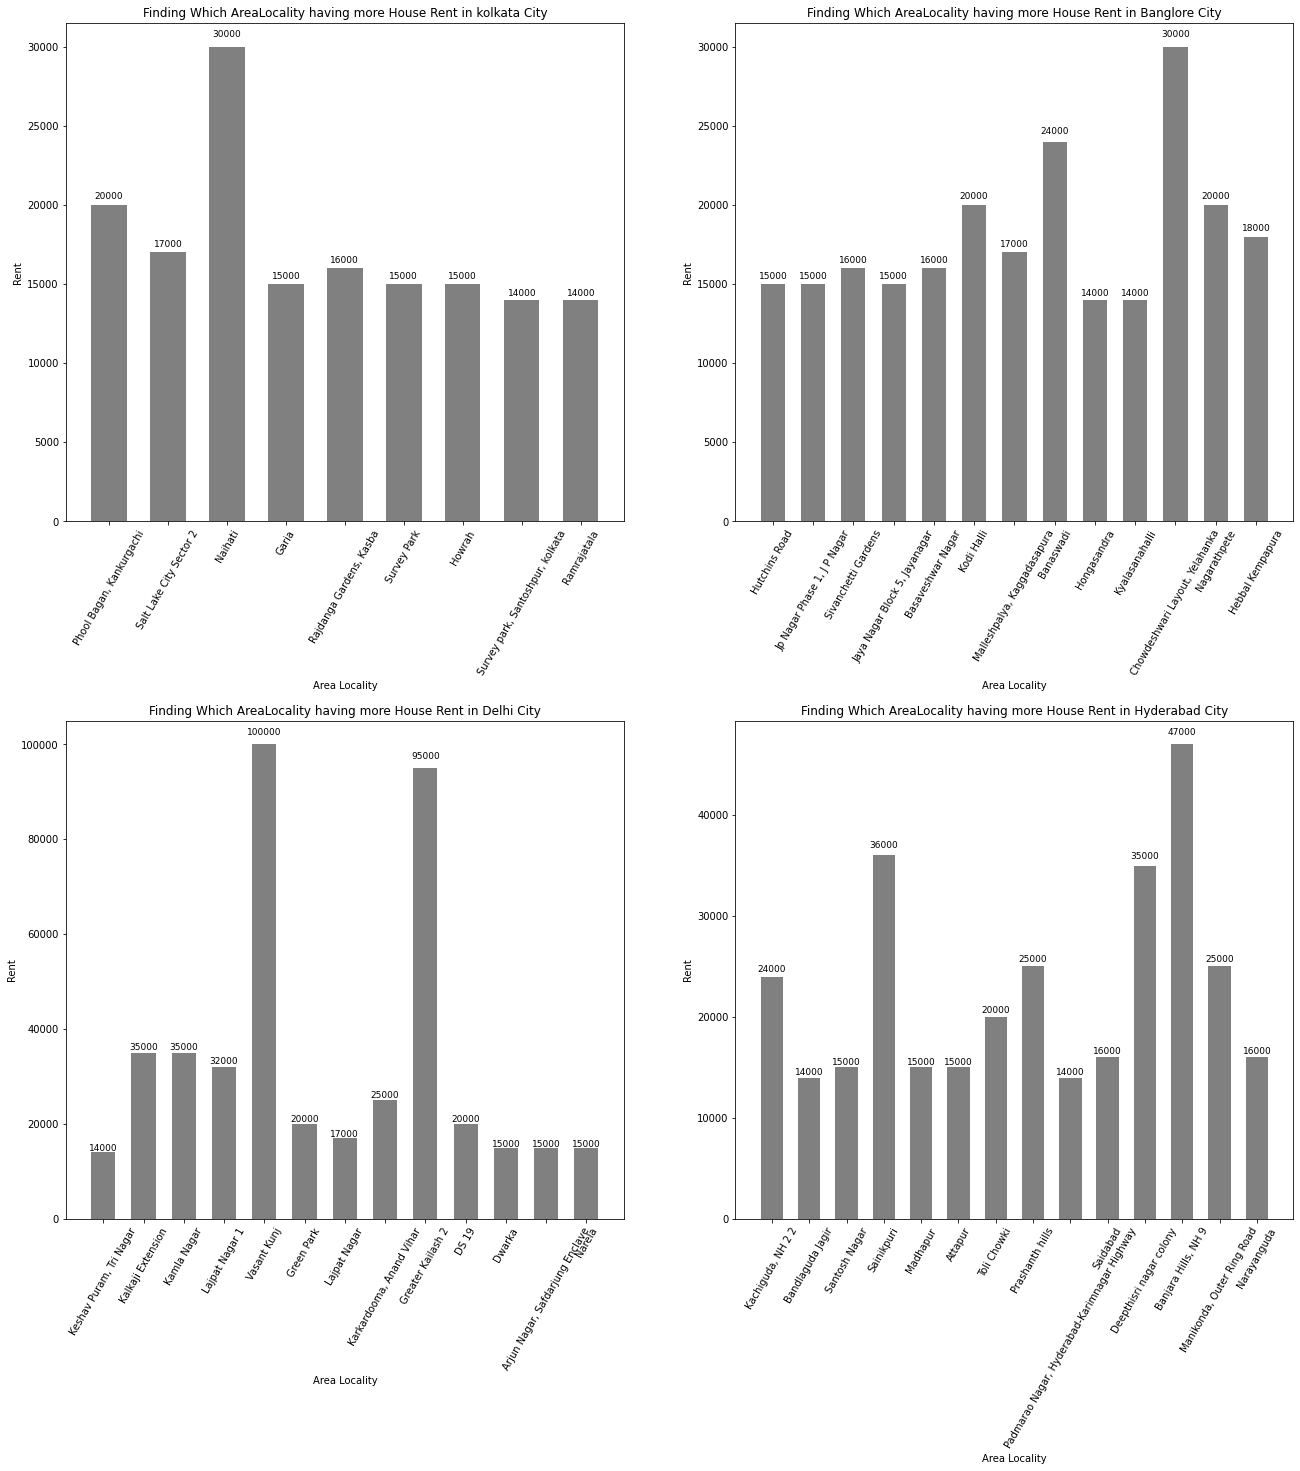

In [20]:
fig  = plt.figure(figsize = (22, 22))
fig.tight_layout()
for i in range(4):
  plot1(i+1)  



1)In the first subplot,in city Kolkatta, Area locality "Naihati" having more value according to House rent.

2)In the second subplot,in city Banglore, Area locality "Chowdeshwari layout,Yalahanka" having more value according to House rent.

3)In the third subplot,in city Delhi, Area locality "Vasant Kunj" having more value according to House rent.

4)In the fourth subplot,in city Hyderabad, Area locality "Banjara Hills,NH9" having more value according to House rent.

#Correlation

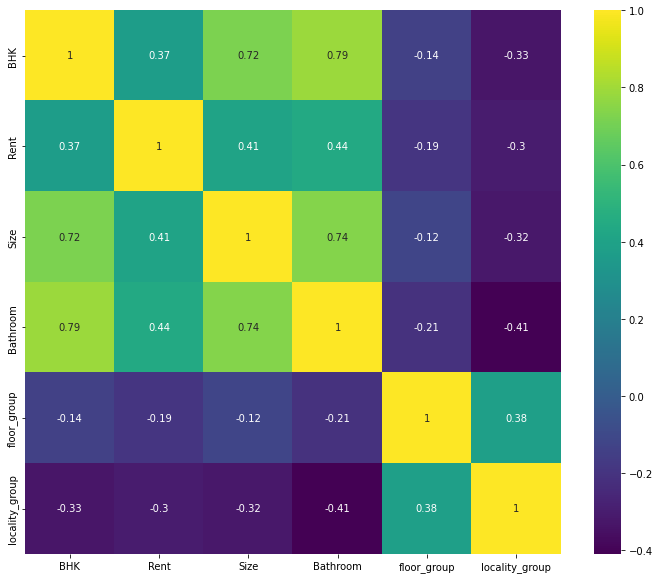

In [21]:
correlation = df.corr().round(2)
plt.figure(figsize = (12,10))
sns.heatmap(correlation, annot = True, cmap = 'viridis')


1)In the above correlation the features BHK and Bathroom and SIZE are highly correlated.


In [22]:
#df = df.drop('Bathroom', 1)
#df = df.drop('BHK', 1)

In [23]:
#correlation = df.corr().round(2)
#plt.figure(figsize = (12,10))
#sns.heatmap(correlation, annot = True, cmap = 'viridis')'''

#Box Plot

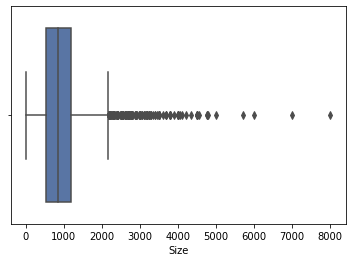

In [24]:
sns.boxplot(x=df["Size"])

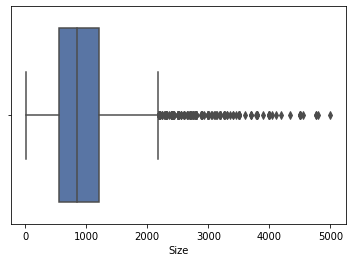

In [25]:
df.drop(df[(df['Size'] > 5000)].index, inplace=True)
sns.boxplot(x=df["Size"])

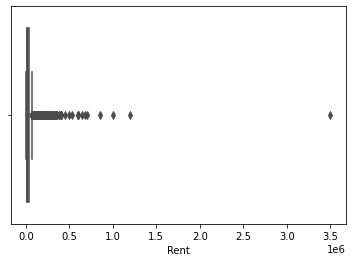

In [26]:
sns.boxplot(x=df["Rent"])

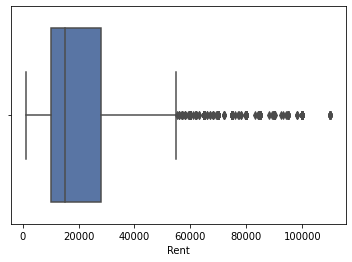

In [27]:
df.drop(df[(df['Rent'] > 110000)].index, inplace=True)
sns.boxplot(x=df["Rent"])



Removing the outliers with help of box plots
dropping the observations which are more than 11000 in rent and size more than 5000

# Model

In [28]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

In [29]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,floor_group,locality_group
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,3
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,2
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,3
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,0,1
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,0,0
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0,0
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0,0


In [30]:
df = df[['Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact', 'floor_group',
       'locality_group', 'Rent', 'BHK', "Bathroom"]]

In [31]:
X = df.iloc[:, 0:8].values

In [32]:
X

array([[1100, 'Super Area', 'Kolkata', ..., 'Contact Owner', 2, 3],
       [800, 'Super Area', 'Kolkata', ..., 'Contact Owner', 1, 2],
       [1000, 'Super Area', 'Kolkata', ..., 'Contact Owner', 1, 0],
       ...,
       [1750, 'Carpet Area', 'Hyderabad', ..., 'Contact Agent', 0, 0],
       [1500, 'Carpet Area', 'Hyderabad', ..., 'Contact Agent', 0, 0],
       [1000, 'Carpet Area', 'Hyderabad', ..., 'Contact Owner', 1, 1]],
      dtype=object)

converting the dataset into an array

In [33]:
y = df.iloc[:, 8].values

#Feature Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder_area_type = LabelEncoder()
label_encoder_city = LabelEncoder()
label_encoder_furnishing = LabelEncoder()
label_encoder_tenant = LabelEncoder()
label_encoder_contract = LabelEncoder()

In [36]:
X[:,1] = label_encoder_area_type.fit_transform(X[:,1])
X[:,2] = label_encoder_city.fit_transform(X[:,2])
X[:,3] = label_encoder_furnishing.fit_transform(X[:,3])
X[:,4] = label_encoder_tenant.fit_transform(X[:,4])
X[:,5] = label_encoder_contract.fit_transform(X[:,5])

converting the categorical values into quantitative values using label encoder from sklearn.preprocessing lib,
 
 Features are,(areatype, city, furnishing,tenant,contract).



#Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
y_standard = scaler.fit_transform(y.reshape(-1,1))

Decomposing the big values into smaller values within the range of (-1,1) using standard scaler tool

#Model Building

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_standard, test_size = 0.3, random_state = 0)

In [40]:
X_train.shape, y_train.shape

((3136, 8), (3136, 1))

In [41]:
X_test.shape, y_test.shape

((1344, 8), (1344, 1))

Splitting the dataset into train and test set, for traing the model, one train set ,for testing the model another test set. 

##Linear Regression

In [42]:
def LinearRegression1(X, y):
    lr_model.fit(X, y)
    lr_normal_intercept = lr_model.intercept_
    #lr_normal_intercept
    lr_normal_coef = lr_model.coef_
    #lr_normal_coef
    lr_normal_score = lr_model.score(X, y)
    #lr_normal_score_test = lr_model.score(X, y)
    previsoes = lr_model.predict(X)
    mse_lr_normal = mean_absolute_error(y, previsoes)
    rmse_lr_normal = np.sqrt(mean_squared_error(y, previsoes))
    return(lr_normal_score, mse_lr_normal, rmse_lr_normal )

In [43]:
Modeltrain = LinearRegression1(X_train, y_train)
print("Linear Regression")
print("\n")
print("Train_accuracy           "+str(round(Modeltrain[0],3)))
print("Mean Square Error        "+str(round(Modeltrain[1],3)))
print("Root Mean Square Error   "+str(round(Modeltrain[2],3)))
print('_ '*16)
Modeltest = LinearRegression1(X_test, y_test)
print("Test_accuracy            "+str(round(Modeltest[0],3)))
print("Mean Square Error        "+str(round(Modeltest[1],3)))
print("Root Mean Square Error   "+str(round(Modeltest[2],3)))

Linear Regression


Train_accuracy           0.591
Mean Square Error        0.44
Root Mean Square Error   0.641
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Test_accuracy            0.616
Mean Square Error        0.433
Root Mean Square Error   0.616


##Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
modelRidge = Ridge(alpha=10)

In [45]:
modelRidge.fit(X_train, y_train)

Ridge(alpha=10)

In [46]:
def Ridge(X,Y):
      modelRidge.fit(X, Y)
      lr_ridge_score = modelRidge.score(X, Y)
      return(lr_ridge_score)

In [47]:
Modeltrain = Ridge(X_train,y_train)
Modeltest  = Ridge(X_test,y_test)
print("Ridge Regression")
print("\n")
print("Train_accuracy   "+str(round(Modeltrain,2)))
print('_ '*11)
print("\n")
print("Test_accuracy    "+str(round(Modeltest,2)))

Ridge Regression


Train_accuracy   0.59
_ _ _ _ _ _ _ _ _ _ _ 


Test_accuracy    0.62


##Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
X_poly_train.shape, X_poly_test.shape

((3136, 45), (1344, 45))

In [50]:
def poly(X,y):
      lr_poly = LinearRegression()
      lr_poly.fit(X, y)
      lr_poly_normal_score = lr_poly.score(X, y)
      previsoes = lr_poly.predict(X)
      mse_poly_normal = mean_absolute_error(y, previsoes)
      rmse_poly_normal = np.sqrt(mean_squared_error(y, previsoes))
      return(lr_poly_normal_score, mse_poly_normal, rmse_poly_normal)

In [51]:
Modeltrain2 = poly(X_poly_train,y_train)
Modeltest2  = poly(X_poly_test,y_test)
print("polynomial Regression")
print("\n")
print("Train_accuracy           "+str(round(Modeltrain2[0],3)))
print("Mean Square Error        "+str(round(Modeltrain2[1],3)))
print("Root Mean Square Error   "+str(round(Modeltrain2[2],3)))
print('_ '*15)
print("\n")
print("Test_accuracy            "+str(round(Modeltest2[0],3)))
print("Mean Square Error        "+str(round(Modeltest2[1],3)))
print("Root Mean Square Error   "+str(round(Modeltest2[2],3)))

polynomial Regression


Train_accuracy           0.712
Mean Square Error        0.343
Root Mean Square Error   0.538
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Test_accuracy            0.732
Mean Square Error        0.331
Root Mean Square Error   0.514


##Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

In [53]:
def randforest(X,y):
    regressor_rf.fit(X, y)
    lr_normal_rf = regressor_rf.score(X, y)
    #lr_normal_rf_test = regressor_rf.score(X, y)
    previsoes = regressor_rf.predict(X)
    mse_lr_normal_rf  = mean_absolute_error(y, previsoes)
    rmse_lr_normal_rf = np.sqrt(mean_squared_error(y, previsoes))
    return(lr_normal_rf, mse_lr_normal_rf, rmse_lr_normal_rf)

In [54]:
Modeltrain3 = randforest(X_train,y_train)
Modeltest3  = randforest(X_test,y_test)
print("Random Forest")
print("\n")
print("Train_accuracy           "+str(round(Modeltrain3[0],3)))
print("Mean Square Error        "+str(round(Modeltrain3[1],3)))
print("Root Mean Square Error   "+str(round(Modeltrain3[2],3)))
print('_ '*15)
print("\n")
print("Test_accuracy            "+str(round(Modeltest3[0],3)))
print("Mean Square Error        "+str(round(Modeltest3[1],3)))
print("Root Mean Square Error   "+str(round(Modeltest3[2],3)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest


Train_accuracy           0.938
Mean Square Error        0.134
Root Mean Square Error   0.249
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Test_accuracy            0.959
Mean Square Error        0.116
Root Mean Square Error   0.203


#SVR

In [55]:
from sklearn.svm import SVR

In [56]:
def svr(X,y):
      regressor_svr_linear = SVR(kernel = 'linear')
      regressor_svr_linear.fit(X, y.ravel())
      standard_svm_linear = regressor_svr_linear.score(X, y)
      previsoes = regressor_svr_linear.predict(X)
      y_test_inverse = scaler.inverse_transform(y)
      previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))
      mse_svr_linear_standard  = mean_absolute_error(y_test_inverse, previsoes_inverse)
      rmse_svm_linear_standard = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))
      return(standard_svm_linear, mse_svr_linear_standard, rmse_svm_linear_standard)

In [57]:
Modeltrain4 = svr(X_train,y_train)
Modeltest4  = svr(X_test,y_test)
print("SVR")
print("\n")
print("Train_accuracy           "+str(round(Modeltrain4[0],3)))
print('_ '*15)
print("\n")
print("Test_accuracy            "+str(round(Modeltest4[0],3)))

SVR


Train_accuracy           0.538
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Test_accuracy            0.559


Random forest is the best model among all the models with 95% accuracy